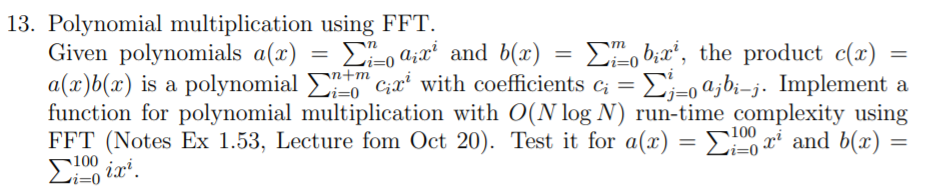

In [1]:
import numpy as np
import math as math
import time
import matplotlib.pyplot as plot

def PolyMult(a,b):
    """
    Multiply two polynomials given as coefficient vectors
    using FFT
    """
    #choose order as power of 2, greater than double the size of input polynomials
    N = max(len(a),len(b))
    p = math.ceil(math.log(2*N,2))
    n = 2**p
    padding = n-N
    
    #pad vectors to make example 1.51 applicable (periodize sequences)
    ap = np.copy(a)
    bp = np.copy(b)
    ap = np.pad(ap,(0,padding),'constant',constant_values=(0,0))
    bp = np.pad(bp,(0,padding),'constant',constant_values=(0,0))
    
    #transform
    af = np.fft.fft(ap)
    bf = np.fft.fft(bp)
    
    #multiply
    cf = af * bf
    
    #transform back and trim
    return np.fft.ifft(cf)[0:2*N-1]

a = np.ones(101)
b = np.arange(101)

In [2]:
start = time.time()
t = PolyMult(a,b)
end = time.time()
tP = end - start

start = time.time()
c = np.convolve(a,b)
end = time.time()
tC = end - start

print("Execution time PolyMult:", tP)
print("Execution time numpy.convolve:", tC)

Execution time PolyMult: 0.0015687942504882812
Execution time numpy.convolve: 0.0013358592987060547


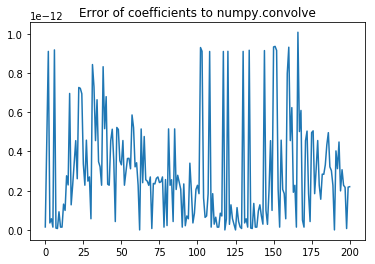

In [3]:
err = (abs(c-t))

plot.title("Error of coefficients to numpy.convolve")
plot.plot(range(201),err)
plot.show()

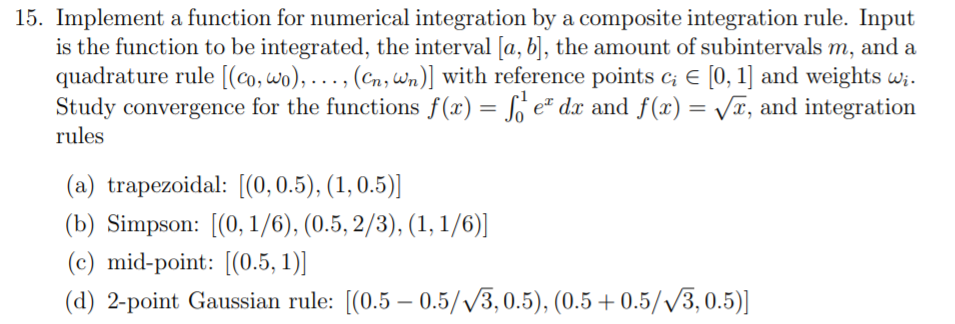

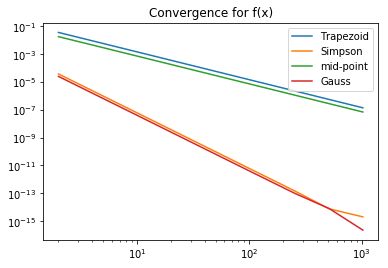

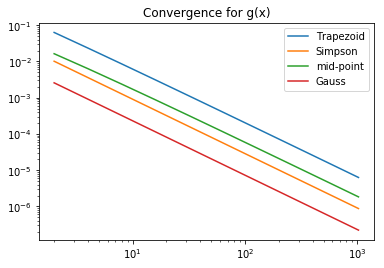

In [7]:
import numpy as np
import math as math
import matplotlib.pyplot as plot

def QuadIntegration(function, interval, m, rule):
    """
    Numerical integration by composite integration with
    quadrature rules
    function: function to integrate
    interval: [a,b] interval to integrate on
    m: number of subintervals to partition to
    rule: [[c0,w0],...[cn,wn]] quadrature rule to use
    """
    h = (interval[1]-interval[0])/m
    #catch 1 dimensional array
    rule = np.array(rule, ndmin = 2)
    #get number of points for rule
    k = np.shape(rule)[0]
    t = interval[0]
    Q = 0
    
    for i in range(m):
        for j in range(k):
            w = rule[j][1]
            x = t + h*rule[j][0]
            Q += w * function(x)
        t += h
        
    return h*Q

rTrap = np.array(([0,0.5],[1,0.5]))
rSimp = np.array(([0,1/6],[0.5,2/3],[1,1/6]))
rMid = np.array(([0.5,1]))
rGauss = np.array(([.5-.5/(3**(1/2)),.5],[.5+.5/(3**(1/2)),.5]))
f = lambda x: math.exp(x)
g = lambda x: x**(1/2)

maxm = 10
x = np.zeros(maxm)
fT = np.zeros(maxm)
fS = np.zeros(maxm)
fM = np.zeros(maxm)
fG = np.zeros(maxm)
gT = np.zeros(maxm)
gS = np.zeros(maxm)
gM = np.zeros(maxm)
gG = np.zeros(maxm)

for i in range(1,maxm+1):
    x[i-1] = 2**i
    fT[i-1] = QuadIntegration(f,[0,1],2**i,rTrap)
    gT[i-1] = QuadIntegration(g,[0,1],2**i,rTrap)
    fS[i-1] = QuadIntegration(f,[0,1],2**i,rSimp)
    gS[i-1] = QuadIntegration(g,[0,1],2**i,rSimp)
    fM[i-1] = QuadIntegration(f,[0,1],2**i,rMid)
    gM[i-1] = QuadIntegration(g,[0,1],2**i,rMid)
    fG[i-1] = QuadIntegration(f,[0,1],2**i,rGauss)
    gG[i-1] = QuadIntegration(g,[0,1],2**i,rGauss)

gE = 2./3.
fE = math.e - 1

plot.yscale('log')
plot.xscale('log')
plot.plot(x,abs(fT-fE),label="Trapezoid")
plot.plot(x,abs(fS-fE),label="Simpson")
plot.plot(x,abs(fM-fE),label="mid-point")
plot.plot(x,abs(fG-fE),label="Gauss")
plot.legend(loc='upper right')
plot.title("Convergence for f(x)")
plot.show()

plot.figure()
plot.yscale('log')
plot.xscale('log')
plot.plot(x,abs(gT-gE),label="Trapezoid")
plot.plot(x,abs(gS-gE),label="Simpson")
plot.plot(x,abs(gM-gE),label="mid-point")
plot.plot(x,abs(gG-gE),label="Gauss")
plot.legend(loc='upper right')
plot.title("Convergence for g(x)")
plot.show()

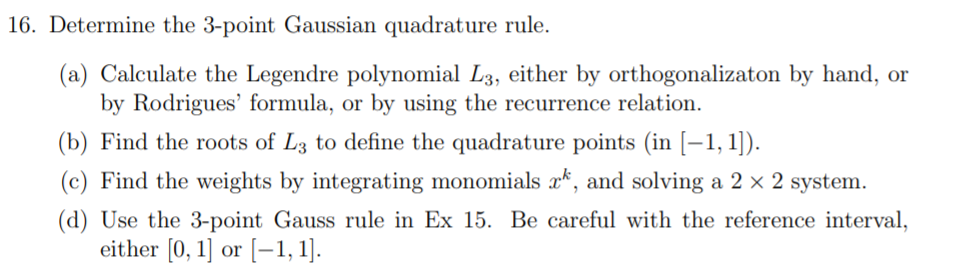

(a)

Rodrigues' formula: $$L_n(x)=\frac{1}{2^nn!}\frac{d^n}{dx^n}(x^2-1)^n$$
Find the derivatives of the polynomial
$$f(x)=(x^2-1)^3$$
$$f'(x)=6x(x^2-1)^2$$
$$f''(x) = 24x^4-24x^2+6(x^2-1)^2$$
$$f^{(3)} = \frac{5}{2}\cdot48x^3-\frac{3}{2}\cdot48x$$
So we get
$$L_3(x) = \frac{1}{48}\cdot48(\frac{5}{2}x^3-\frac{3}{2}x)$$
(b)

The first root is obvious with $x_1 = 0$. The other 2 roots can be found through the resulting quadratic polynomial. $x_0 = -\sqrt{\frac{3}{5}}$ and $x_2 = \sqrt{\frac{3}{5}}$

(c)

$$[I]: \int_{-1}^{1} 1 \,dx = 2 = w_0\cdot1 + w_1\cdot1 + w_2\cdot1$$
$$[II]: \int_{-1}^{1} x \,dx = 0 = w_0\cdot-\sqrt{\frac{3}{5}} + w_1\cdot0 + w_2\cdot\sqrt{\frac{3}{5}}$$
$$[III]: \int_{-1}^{1} x^2 \,dx = \frac{2}{3} = w_0\cdot\frac{3}{5} + w_1\cdot0 + w_2\cdot\frac{3}{5}$$
From [II] it is easy to see that $$w_0 = w_2$$ Thus we can derive from [III] that $$w_0 = w_2 = \frac{5}{9}$$ and finally by substituting in [I] we get $$w_1 = \frac{8}{9}$$

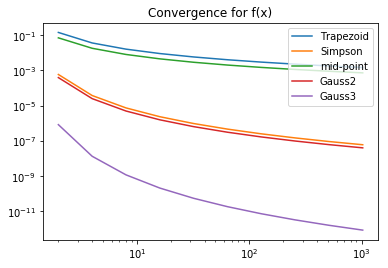

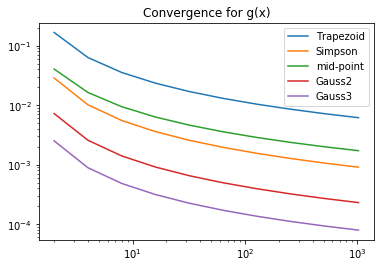

In [5]:
"""
IMPORTANT: run code cell above first
"""
#rescale weights and points
rGauss3 = np.array(([0.5-0.5*(3/5)**(1/2),5/18],[0.5,8/18],[0.5+0.5*(3/5)**(1/2),5/18]))

fG3 = np.zeros(maxm)
gG3 = np.zeros(maxm)

for i in range(1,maxm+1):
    fG3[i-1] = QuadIntegration(f,[0,1],i,rGauss3)
    gG3[i-1] = QuadIntegration(g,[0,1],i,rGauss3)
    
plot.yscale('log')
plot.xscale('log')
plot.plot(x,abs(fT-fE),label="Trapezoid")
plot.plot(x,abs(fS-fE),label="Simpson")
plot.plot(x,abs(fM-fE),label="mid-point")
plot.plot(x,abs(fG-fE),label="Gauss2")
plot.plot(x,abs(fG3-fE),label="Gauss3")
plot.legend(loc='upper right')
plot.title("Convergence for f(x)")
plot.show()

plot.figure()
plot.yscale('log')
plot.xscale('log')
plot.plot(x,abs(gT-gE),label="Trapezoid")
plot.plot(x,abs(gS-gE),label="Simpson")
plot.plot(x,abs(gM-gE),label="mid-point")
plot.plot(x,abs(gG-gE),label="Gauss2")
plot.plot(x,abs(gG3-gE),label="Gauss3")
plot.legend(loc='upper right')
plot.title("Convergence for g(x)")
plot.show()